<a href="https://colab.research.google.com/github/Sharibakhan/ADBMS-pracs/blob/main/assigmnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px


In [2]:
trades_df = pd.read_csv("/content/historical_data.csv")
sentiment_df = pd.read_csv("/content/fear_greed_index.csv")


In [3]:
print(trades_df.columns)
print(sentiment_df.columns)

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [ ]:
trades_df['Timestamp'] = pd.to_datetime(trades_df['Timestamp'])
sentiment_df['timestamp'] = pd.to_datetime(sentiment_df['timestamp'])

trades_df['date_only'] = trades_df['Timestamp'].dt.date
sentiment_df['date_only'] = sentiment_df['timestamp'].dt.date
sentiment_df = sentiment_df.rename(columns={'classification': 'Sentiment'})

# Merge on date
merged_df = pd.merge(trades_df, sentiment_df[['date_only', 'Sentiment']], on='date_only', how='inner')


In [4]:
print(trades_df.info(memory_usage='deep'))
print(sentiment_df.info(memory_usage='deep'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [6]:
import pandas as pd

# Step 1: Convert timestamps safely
trades_df['Timestamp'] = pd.to_datetime(trades_df['Timestamp'], unit='s', errors='coerce')
sentiment_df['timestamp'] = pd.to_datetime(sentiment_df['timestamp'], unit='s', errors='coerce')

# Drop rows where conversion failed
trades_df.dropna(subset=['Timestamp'], inplace=True)
sentiment_df.dropna(subset=['timestamp'], inplace=True)

# Step 2: Extract only date (not full datetime)
trades_df['date_only'] = trades_df['Timestamp'].dt.date
sentiment_df['date_only'] = sentiment_df['timestamp'].dt.date

# Step 3: Clean and deduplicate sentiment data
sentiment_df = sentiment_df.rename(columns={'classification': 'Sentiment'})
sentiment_df = sentiment_df[['date_only', 'Sentiment']].drop_duplicates()

# Step 4: Merge safely
merged_df = pd.merge(trades_df, sentiment_df, on='date_only', how='inner')

# Step 5: Preview result
print(merged_df.head())
print(merged_df['Sentiment'].value_counts())


Empty DataFrame
Columns: [Account, Coin, Execution Price, Size Tokens, Size USD, Side, Timestamp IST, Start Position, Direction, Closed PnL, Transaction Hash, Order ID, Crossed, Fee, Trade ID, Timestamp, date_only, Sentiment]
Index: []
Series([], Name: count, dtype: int64)


In [11]:
print(trades_df['Timestamp'].min(), trades_df['Timestamp'].max())
print(sentiment_df['timestamp'].min(), sentiment_df['timestamp'].max())


1680000000000.0 1750000000000.0
1517463000 1746163800


In [6]:
#break the process into cleaning steps for both DataFrames:
# 1. Clean trades_df

# Convert 'Timestamp' to numeric (handle scientific notation like 1.73E+12)
trades_df['Timestamp'] = pd.to_numeric(trades_df['Timestamp'], errors='coerce')

# Remove invalid timestamps: Keep only Unix timestamps between 2000 and 2030
valid_start = pd.Timestamp("2000-01-01").timestamp() * 1000  # in milliseconds
valid_end = pd.Timestamp("2030-12-31").timestamp() * 1000

trades_df = trades_df[(trades_df['Timestamp'] >= valid_start) &
                      (trades_df['Timestamp'] <= valid_end)]

# Convert to datetime from milliseconds
trades_df['Timestamp'] = pd.to_datetime(trades_df['Timestamp'], unit='ms', errors='coerce')

# Drop rows where conversion failed
trades_df = trades_df.dropna(subset=['Timestamp'])

# Create clean date column
trades_df['date_only'] = trades_df['Timestamp'].dt.date



In [7]:
#Clean sentiment_df:

# Convert 'timestamp' to numeric
sentiment_df['timestamp'] = pd.to_numeric(sentiment_df['timestamp'], errors='coerce')

# Remove invalid timestamps
valid_start = pd.Timestamp("2000-01-01").timestamp()
valid_end = pd.Timestamp("2030-12-31").timestamp()

sentiment_df = sentiment_df[(sentiment_df['timestamp'] >= valid_start) &
                            (sentiment_df['timestamp'] <= valid_end)]

# Convert to datetime from seconds
sentiment_df['timestamp'] = pd.to_datetime(sentiment_df['timestamp'], unit='s', errors='coerce')

# Drop rows where conversion failed
sentiment_df = sentiment_df.dropna(subset=['timestamp'])

# Create date column and rename for merge
sentiment_df['date_only'] = sentiment_df['timestamp'].dt.date
sentiment_df = sentiment_df.rename(columns={'classification': 'Sentiment'})


In [8]:
# Merge on cleaned 'date_only' column
merged_df = pd.merge(trades_df, sentiment_df[['date_only', 'Sentiment']], on='date_only', how='inner')

# Preview merged data
print("✅ Merged rows:", len(merged_df))
print(merged_df[['Timestamp', 'Sentiment']].head())


✅ Merged rows: 184263
            Timestamp Sentiment
0 2024-10-27 03:33:20     Greed
1 2024-10-27 03:33:20     Greed
2 2024-10-27 03:33:20     Greed
3 2024-10-27 03:33:20     Greed
4 2024-10-27 03:33:20     Greed


In [9]:
# Count of each sentiment
print(merged_df['Sentiment'].value_counts())


Sentiment
Fear             133871
Greed             36289
Neutral            7141
Extreme Greed      6962
Name: count, dtype: int64


In [10]:
# How performance varies by sentiment
avg_pnl_by_sentiment = merged_df.groupby('Sentiment')['Closed PnL'].mean()
print(avg_pnl_by_sentiment)


Sentiment
Extreme Greed    25.418772
Fear             50.047622
Greed            87.894859
Neutral          22.229713
Name: Closed PnL, dtype: float64


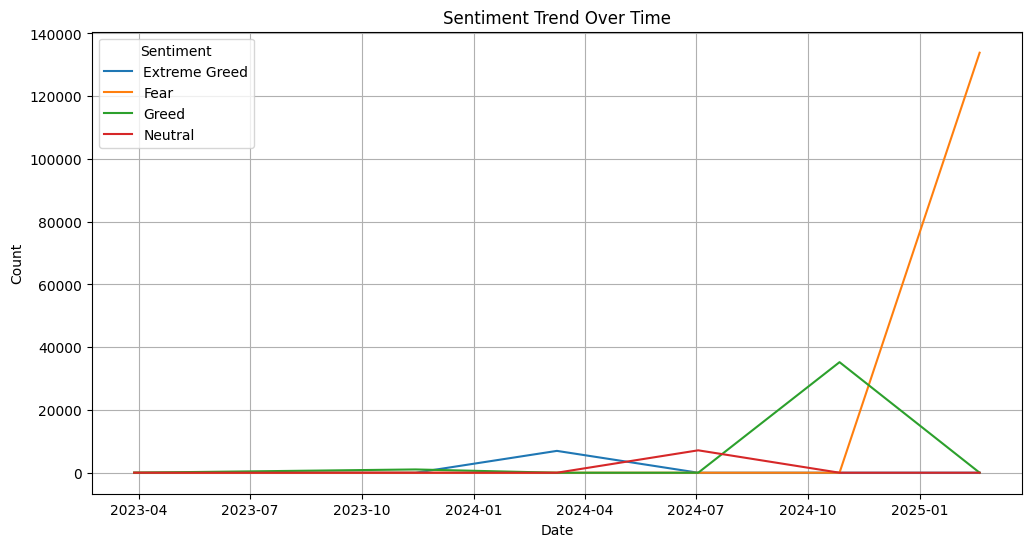

In [11]:
import matplotlib.pyplot as plt

# Daily sentiment counts
daily_sentiment = merged_df.groupby(['date_only', 'Sentiment']).size().unstack().fillna(0)

daily_sentiment.plot(kind='line', figsize=(12, 6))
plt.title("Sentiment Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.grid()
plt.show()


In [12]:
merged_df.to_csv('merged_sentiment_trade_data.csv', index=False)


<Axes: ylabel='count'>

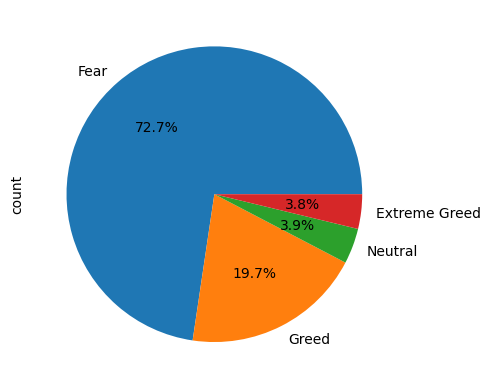

In [13]:
#Part 2: Exploratory Data Analysis (EDA)

merged_df['Sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%')


In [14]:
#Trader Performance by Sentiment

merged_df.groupby('Sentiment')['Closed PnL'].describe()


,count,mean,std,min,25%,50%,75%,max
Sentiment,,,,,,,,
Extreme Greed,6962.0,25.418772,306.166937,-21524.40000,0.0,0.0,16.186514,2500.95750
Fear,133871.0,50.047622,909.121796,-35681.74723,0.0,0.0,6.042830,135329.09010
Greed,36289.0,87.894859,1148.343968,-117990.10410,0.0,0.0,9.239366,44223.45187
Neutral,7141.0,22.229713,633.704815,-18360.67007,0.0,0.0,1.950048,18282.19011


<Axes: xlabel='Sentiment'>

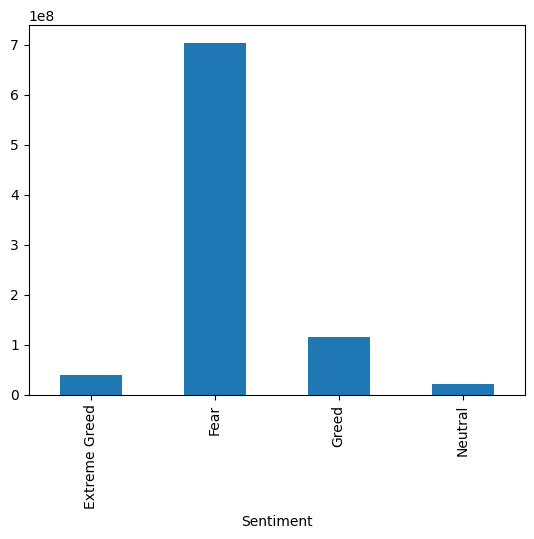

In [15]:
#Total Trade Volume by Sentiment

merged_df.groupby('Sentiment')['Size USD'].sum().plot(kind='bar')


<Axes: title={'center': 'Average PnL by Sentiment'}, xlabel='Sentiment'>

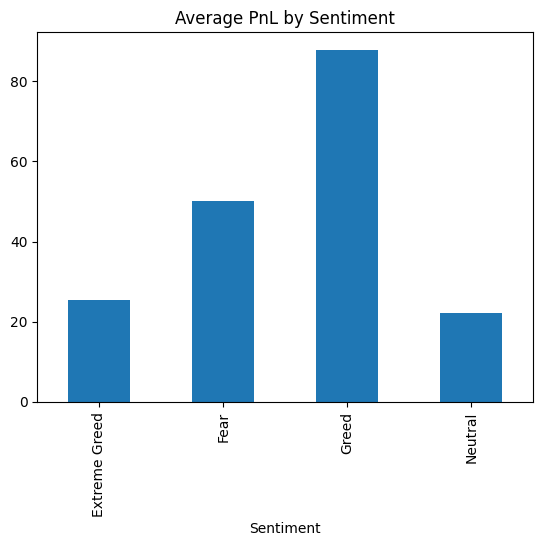

In [16]:
# PnL vs Sentiment (Bar Plot)

merged_df.groupby('Sentiment')['Closed PnL'].mean().plot(kind='bar', title="Average PnL by Sentiment")


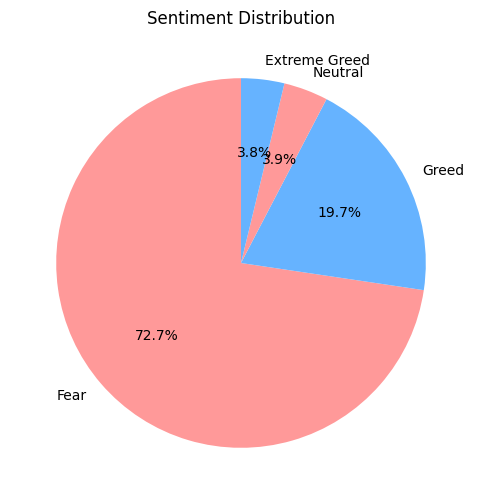

In [17]:
#Part 3: Visualizations

# Pie Chart: Sentiment Distribution

import matplotlib.pyplot as plt

sentiment_counts = merged_df['Sentiment'].value_counts()
plt.figure(figsize=(6, 6))
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title("Sentiment Distribution")
plt.ylabel("")
plt.show()


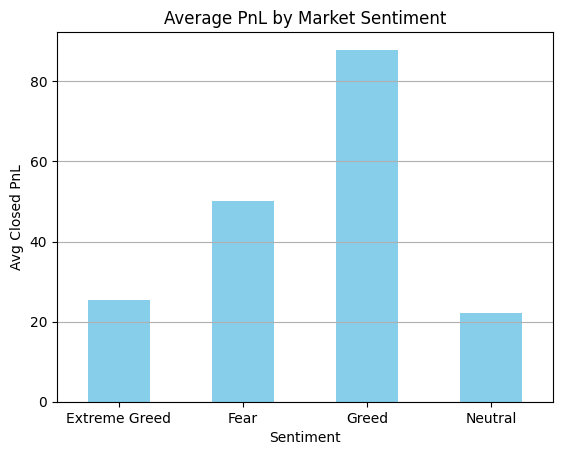

In [20]:
#Bar Chart: Average PnL by Sentiment

avg_pnl_by_sentiment = merged_df.groupby('Sentiment')['Closed PnL'].mean()
avg_pnl_by_sentiment.plot(kind='bar', color='skyblue')
plt.title('Average PnL by Market Sentiment')
plt.ylabel('Avg Closed PnL')
plt.xlabel('Sentiment')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


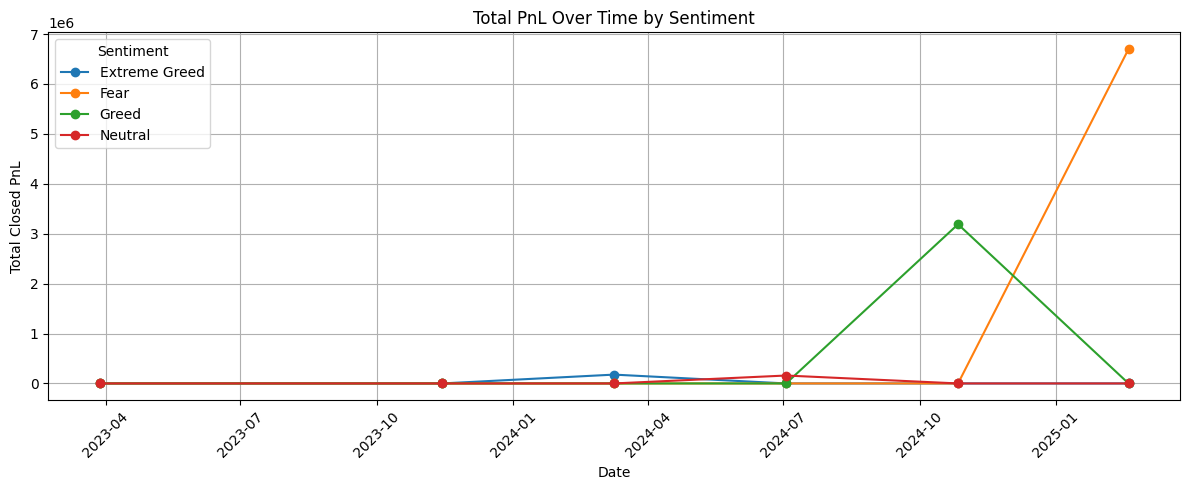

In [22]:
#Time Series Plot: Sentiment Over Time vs Total PnL

merged_df['date_only'] = pd.to_datetime(merged_df['Timestamp']).dt.date
pnl_over_time = merged_df.groupby(['date_only', 'Sentiment'])['Closed PnL'].sum().unstack().fillna(0)

pnl_over_time.plot(figsize=(12, 5), marker='o')
plt.title('Total PnL Over Time by Sentiment')
plt.ylabel('Total Closed PnL')
plt.xlabel('Date')
plt.grid(True)
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
